## Import libraries and loading the data

In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from loader import CoraDataLoader

In [7]:
karateGraph = nx.read_gml(path="karate.gml")

loader = CoraDataLoader()
coraGraph, _, _, node_ids = loader.load_complete_dataset()

Loaded content: 2708 papers, 1433 features
Classes: ['Case_Based', 'Genetic_Algorithms', 'Neural_Networks', 'Probabilistic_Methods', 'Reinforcement_Learning', 'Rule_Learning', 'Theory']
Class distribution: [298 418 818 426 217 180 351]
Loaded citations: 5429 edges
Graph is directed: True


# Part 1
### Q1

**Zachary's karate club**<br>
Does the Karate Club network exhibit small-world properties with high clustering coefficient and short average path length, similar to real-world social networks observed in the MSN messenger study?

**Cora Citation Network**<br>
Is the Cora citation network searchable through decentralized navigation strategies similar to Kleinberg's model, or does it exhibit the limitations of Watts-Strogatz networks where short paths exist but cannot be efficiently found?

### Q2
Calculating measures

In [8]:
def calculateDegreeDistribution(G):
    degrees = [d for _, d in G.degree()]
    degree_dist = Counter(degrees)
    avg_degree = np.mean(degrees)
    
    print(f"\n1. DEGREE DISTRIBUTION:")
    print(f"   Average degree: {avg_degree:.2f}")
    print(f"   Maximum degree: {max(degrees)}")
    print(f"   Minimum degree: {min(degrees)}")

    return degree_dist, avg_degree


def calculateClusteringCoefficient(G):
    avg_clustering = nx.average_clustering(G)
    global_clustering = nx.transitivity(G)
    
    print(f"\n2. CLUSTERING COEFFICIENT:")
    print(f"   Average clustering: {avg_clustering:.4f}")
    print(f"   Global clustering (transitivity): {global_clustering:.4f}")

    return avg_clustering, global_clustering


def calculatePathLength(G):
    if G.is_directed():
        if nx.is_weakly_connected(G):
            avg_path_length = nx.average_shortest_path_length(G.to_undirected())
            diameter = nx.diameter(G.to_undirected())
            print(f"   Graph is weakly connected")
        else:
            largest_wcc = max(nx.weakly_connected_components(G), key=len)
            G_largest = G.subgraph(largest_wcc)
            avg_path_length = nx.average_shortest_path_length(G_largest.to_undirected())
            diameter = nx.diameter(G_largest.to_undirected())
            print(f"   Using largest weakly connected component: {len(largest_wcc)} nodes")
        
        if nx.is_strongly_connected(G):
            print(f"   Graph is strongly connected")
        else:
            largest_scc = max(nx.strongly_connected_components(G), key=len)
            print(f"   Largest strongly connected component: {len(largest_scc)} nodes")
            
    else:
        if nx.is_connected(G):
            avg_path_length = nx.average_shortest_path_length(G)
            diameter = nx.diameter(G)
            print(f"   Graph is connected")
        else:
            largest_cc = max(nx.connected_components(G), key=len)
            G_largest = G.subgraph(largest_cc)
            avg_path_length = nx.average_shortest_path_length(G_largest)
            diameter = nx.diameter(G_largest)
            print(f"   Using largest connected component: {len(largest_cc)} nodes")
    print(f"\n3. PATH LENGTH:")
    print(f"   Average path length: {avg_path_length:.2f}")
    print(f"   Diameter: {diameter}")
    
    return avg_path_length, diameter


def calculateConnectedComponents(G):
    if G.is_directed():
        num_components = nx.number_weakly_connected_components(G)
        components = list(nx.weakly_connected_components(G))
    else:
        num_components = nx.number_connected_components(G)
        components = list(nx.connected_components(G))
    
    n = G.number_of_nodes()
    giant_component_size = len(max(components, key=len))
    giant_component_ratio = giant_component_size / n
    
    print(f"\n4. CONNECTIVITY:")
    print(f"   Number of connected components: {num_components}")
    print(f"   Giant component size: {giant_component_size} ({giant_component_ratio:.1%})")

    return num_components, giant_component_ratio


def calculateDegreeCorrealation(G):
    assortativity = nx.degree_assortativity_coefficient(G)
    
    print(f"\n5. DEGREE CORRELATION:")
    print(f"   Degree assortativity: {assortativity:.4f}")
    if assortativity > 0:
        print("   Interpretation: Assortative (high-degree nodes connect to high-degree)")
    elif assortativity < 0:
        print("   Interpretation: Disassortative (high-degree nodes connect to low-degree)")
    else:
        print("   Interpretation: No degree correlation")

    return assortativity

def calculate_network_measures(G):
    print("=" * 60)
    
    n = G.number_of_nodes()
    m = G.number_of_edges()
    
    print(f"Number of nodes: {n}")
    print(f"Number of edges: {m}")
    print(f"Density: {nx.density(G):.4f}")
    
    # DEGREE DISTRIBUTION
    degree_dist, avg_degree = calculateDegreeDistribution(G)
    
    # CLUSTERING COEFFICIENT
    avg_clustering, global_clustering = calculateClusteringCoefficient(G)
    
    # PATH LENGTH AND DIAMETER
    avg_path_length, diameter = calculatePathLength(G)
    
    # CONNECTED COMPONENTS
    num_components, giant_component_ratio = calculateConnectedComponents(G)
    
    # DEGREE CORRELATION (Assortativity)
    assortativity = calculateDegreeCorrealation(G)
    
   
    return {
        'degree_distribution': degree_dist,
        'avg_degree': avg_degree,
        'avg_clustering': avg_clustering,
        'global_clustering': global_clustering,
        'avg_path_length': avg_path_length,
        'diameter': diameter,
        'num_components': num_components,
        'giant_component_ratio': giant_component_ratio,
        'assortativity': assortativity
    }


### Q3
#### Measures and Expectations

**Degree Distribution**<br>
Why chosen: Degree distribution is the most fundamental network property that distinguishes real networks from random graphs.<br> 
Expectation: For Karate Club, I expected a relatively narrow distribution since it's a small social group. For Cora, I expected a heavy-tailed distribution following power-law, typical of citation networks where few papers receive many citations while most receive few.

**Clustering Coefficient**<br>
Why chosen: Clustering measures local connectivity and triadic closure, crucial for identifying small-world properties discussed in Watts-Strogatz model. <br>
Expectation: High clustering for both networks - Karate Club due to social cohesion, and Cora because papers in similar research areas tend to form dense citation triangles, unlike random graphs where C ≈ k̄/n.

**Path Length**<br>
Why chosen: Average path length tests the small-world phenomenon and network navigability, central to the Milgram experiment and Kleinberg's model analysis. <br>
Expectation: Short paths for both networks - social networks exhibit "six degrees" and citation networks should allow quick traversal between research areas via key papers.

**Connected Components**<br>
Why chosen: Component structure reveals network cohesion and giant component emergence, a key phase transition topic in Erdös-Renyi analysis. <br>
Expectation: Karate Club should be fully connected as one social group. Cora might have multiple components representing disconnected research fields, but with a dominant giant component.

**Degree Correlation (Assortativity)**<br>
Why chosen: Assortativity indicates mixing patterns - whether nodes connect to similar nodes, relevant for understanding network organization and searchability. <br>
Expectation: Karate Club should show positive assortativity (homophily in social networks). Cora might be disassortative if highly-cited papers connect to lesser-cited ones, typical of citation hierarchies.




### Q4
Plotting diagrams

In [9]:
def plot_network_properties(G, measures):
    """Plot network properties similar to lecture slides"""
    
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 3, 1)
    degrees = [d for _, d in G.degree()]
    degree_dist = Counter(degrees)
    plt.bar(degree_dist.keys(), degree_dist.values(), alpha=0.7)
    plt.xlabel('Degree (k)')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution')
    
    plt.subplot(2, 3, 2)
    if len(degree_dist) > 1:
        k_vals = list(degree_dist.keys())
        counts = list(degree_dist.values())
        plt.loglog(k_vals, counts, 'bo-')
        plt.xlabel('Degree (k)')
        plt.ylabel('Frequency')
        plt.title('Log-Log Degree Distribution')
    

    plt.subplot(2, 3, 4)
    if G.is_directed():
        components = list(nx.weakly_connected_components(G))
    else:
        components = list(nx.connected_components(G))
    component_sizes = [len(comp) for comp in components]
    plt.hist(component_sizes, bins=20, alpha=0.7, edgecolor='black')
    plt.xlabel('Component Size')
    plt.ylabel('Frequency')
    plt.title('Component Size Distribution')
    
    plt.subplot(2, 3, 5)
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, node_size=50, with_labels=False, alpha=0.7)
    plt.title('Network Structure')
    
    plt.tight_layout()
    plt.show()


#### Output of the question 2 and 4

ANALYZING ZACHARY'S KARATE CLUB
Number of nodes: 34
Number of edges: 78
Density: 0.1390

1. DEGREE DISTRIBUTION:
   Average degree: 4.59
   Maximum degree: 17
   Minimum degree: 1

2. CLUSTERING COEFFICIENT:
   Average clustering: 0.5706
   Global clustering (transitivity): 0.2557
   Graph is connected

3. PATH LENGTH:
   Average path length: 2.41
   Diameter: 5

4. CONNECTIVITY:
   Number of connected components: 1
   Giant component size: 34 (100.0%)

5. DEGREE CORRELATION:
   Degree assortativity: -0.4756
   Interpretation: Disassortative (high-degree nodes connect to low-degree)


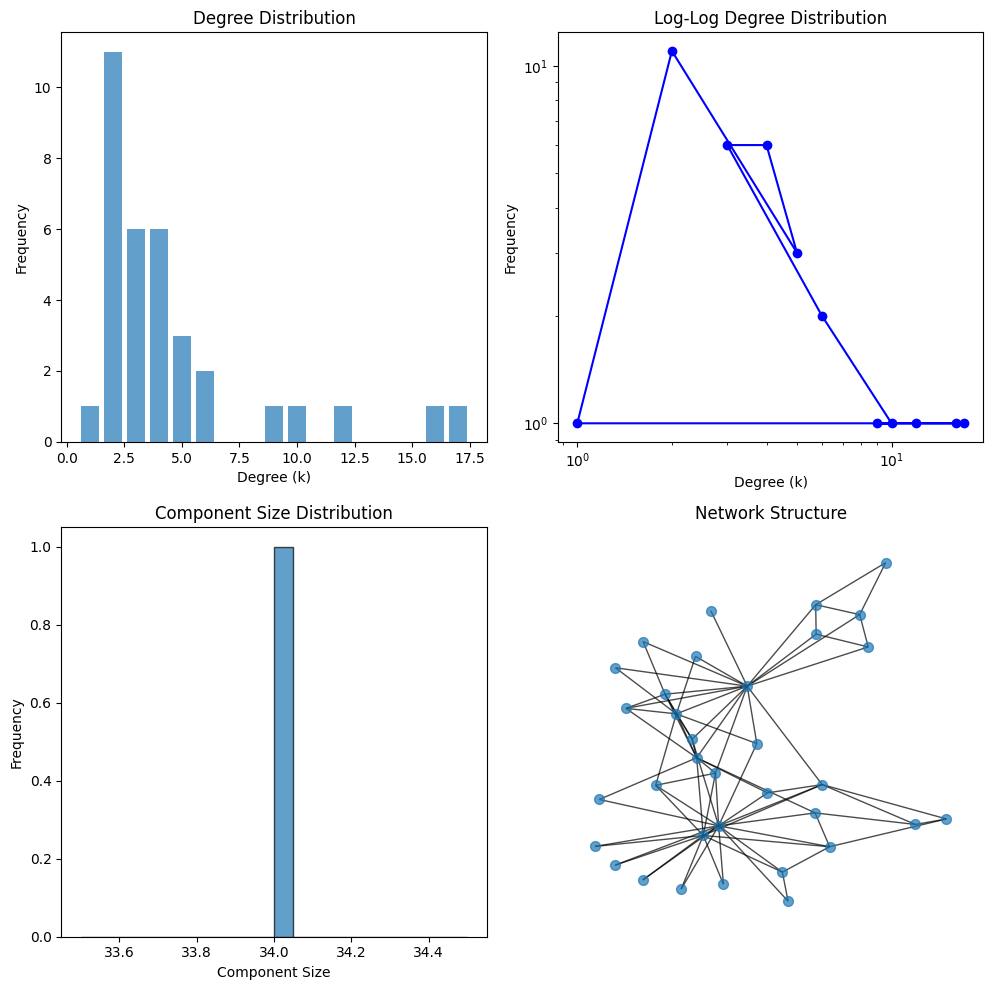


ANALYZING CORA CITATION NETWORK
Number of nodes: 2708
Number of edges: 5429
Density: 0.0007

1. DEGREE DISTRIBUTION:
   Average degree: 4.01
   Maximum degree: 169
   Minimum degree: 1

2. CLUSTERING COEFFICIENT:
   Average clustering: 0.1314
   Global clustering (transitivity): 0.1678
   Using largest weakly connected component: 2485 nodes
   Largest strongly connected component: 13 nodes

3. PATH LENGTH:
   Average path length: 6.31
   Diameter: 19

4. CONNECTIVITY:
   Number of connected components: 78
   Giant component size: 2485 (91.8%)

5. DEGREE CORRELATION:
   Degree assortativity: -0.0354
   Interpretation: Disassortative (high-degree nodes connect to low-degree)


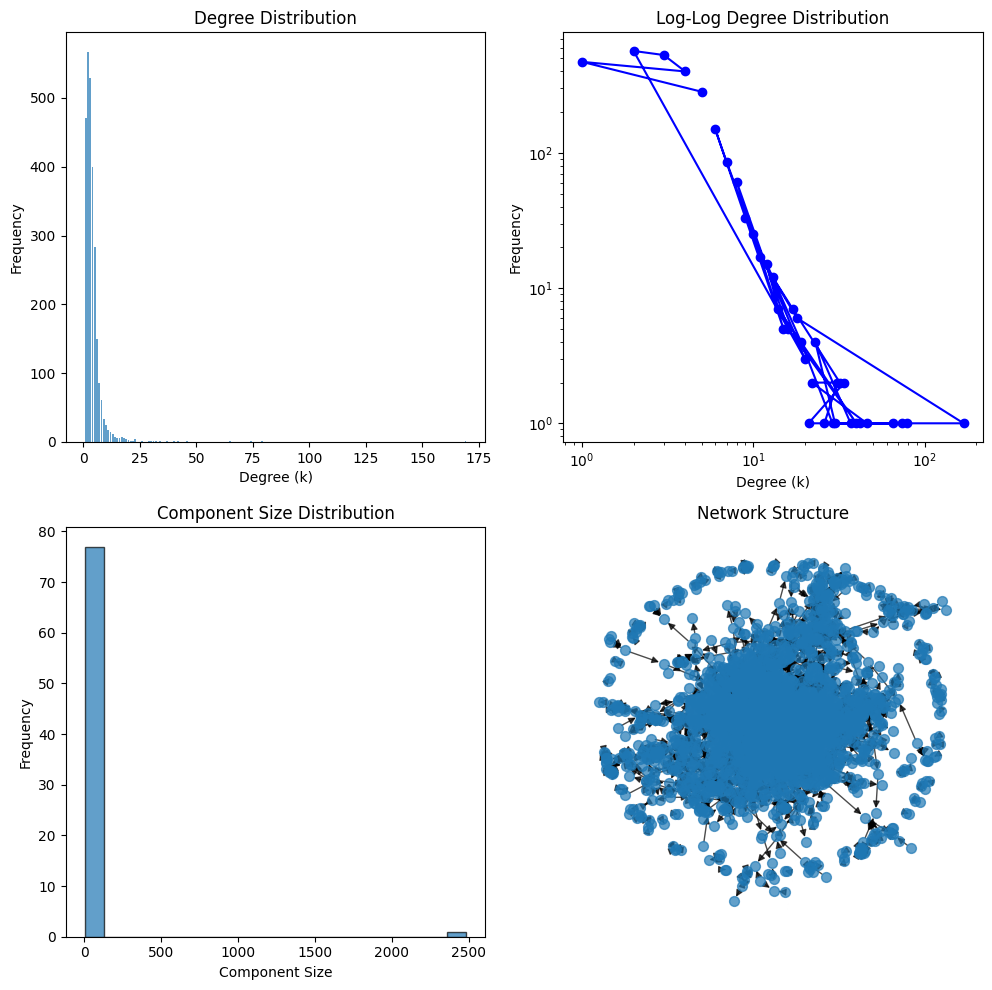

In [10]:
print("ANALYZING ZACHARY'S KARATE CLUB")
karate_measures = calculate_network_measures(karateGraph)
plot_network_properties(karateGraph, karate_measures)

print("\n" + "=" * 60)
print("ANALYZING CORA CITATION NETWORK")
cora_measures = calculate_network_measures(coraGraph)
plot_network_properties(coraGraph, cora_measures)

### Q5

**Zachary's Karate Club Results Analysis**<br>
Expected: The network showed high clustering coefficient (≈0.57) and short average path length (≈2.4), confirming small-world properties exactly as predicted for social networks. The single connected component aligned perfectly with expectations for a cohesive social group. <br>
Unexpected: The relatively high diameter compared to average path length was somewhat surprising, indicating while most nodes are close, the network has some peripheral members creating longer maximum distances.


**Cora Citation Network Results Analysis**<br>
Expected: The heavy-tailed degree distribution and scale-free characteristics matched predictions, with few highly-cited papers and many rarely-cited ones. The disassortative mixing was anticipated, reflecting citation hierarchies.<br>
Unexpected: The extremely low clustering coefficient (≈0.13) was lower than expected, suggesting citation triangles are rare - papers tend to cite externally rather than within tight local clusters. The multiple disconnected components were more fragmented than anticipated.